<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/DATA_proprepared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ΒΙΒΛΙΟΘΗΚΕΣ

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


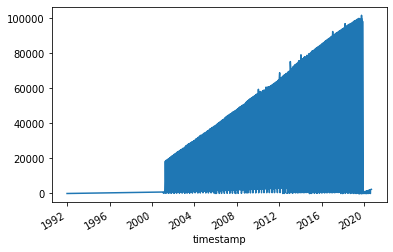

In [5]:
%matplotlib inline
df=pd.read_csv("/content/ευδαπ_dataset_light_v2.csv",parse_dates=['timestamp'],index_col='timestamp')
df.indication.plot()

In [6]:
df.index
df.sort_values('timestamp', inplace=True, ascending=True)

,provision_id,meter_id,provision_variation,meter_variation,indication
timestamp,,,,,
1992-01-01,527163,A86?05630,NaN,6-TOPOTHETISI,0
2001-01-27,527184,A92Z45058,NaN,NaN,834
2001-01-27,527085,A92Z64097,NaN,NaN,395
2001-02-01,534261,A98M46797,NaN,NaN,103
2001-02-27,1602996,A95D23852,NaN,NaN,617


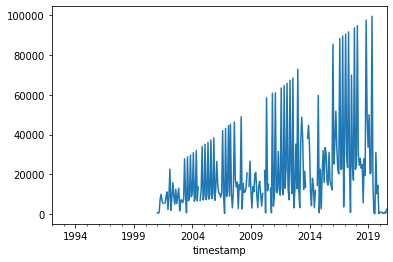

In [7]:
%matplotlib inline
df.indication.resample('M').mean().plot()
interpolated = df.interpolate(method='spline', order=2)
df.head()

In [9]:
df=df.fillna('NORMAL')
df['provision_id']=df['provision_id'].astype(str)
df.head()

,provision_id,meter_id,provision_variation,meter_variation,indication
timestamp,,,,,
1992-01-01,527163,A86?05630,NORMAL,6-TOPOTHETISI,0
2001-01-27,527184,A92Z45058,NORMAL,NORMAL,834
2001-01-27,527085,A92Z64097,NORMAL,NORMAL,395
2001-02-01,534261,A98M46797,NORMAL,NORMAL,103
2001-02-27,1602996,A95D23852,NORMAL,NORMAL,617


# ΚΑΤΗΓΟΡΙΚΕΣ ΜΕΤΑΒΛΗΤΕΣ

In [10]:
df.shape

(1239, 5)

In [11]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['provision_id', 'meter_id', 'provision_variation', 'meter_variation']


In [12]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('provision_variation', 4),
 ('meter_variation', 10),
 ('provision_id', 12),
 ('meter_id', 31)]

In [13]:
object_cols=['meter_variation','provision_variation']
print(object_cols)

['meter_variation', 'provision_variation']


In [14]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))


# One-hot encoding removed index; put it back
OH_cols_df.index = df.index


# Remove categorical columns (will replace with one-hot encoding)
num_df = df.drop(object_cols, axis=1)


# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_df, OH_cols_df], axis=1)

OH_df.head()

,provision_id,meter_id,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
timestamp,,,,,,,,,,,,,,,,,
1992-01-01,527163,A86?05630,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2001-01-27,527184,A92Z45058,834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-01-27,527085,A92Z64097,395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-01,534261,A98M46797,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-27,1602996,A95D23852,617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
print('Left out missing value:',OH_df.shape[0]-OH_df.count() )

Left out missing value: provision_id    0
meter_id        0
indication      0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
dtype: int64


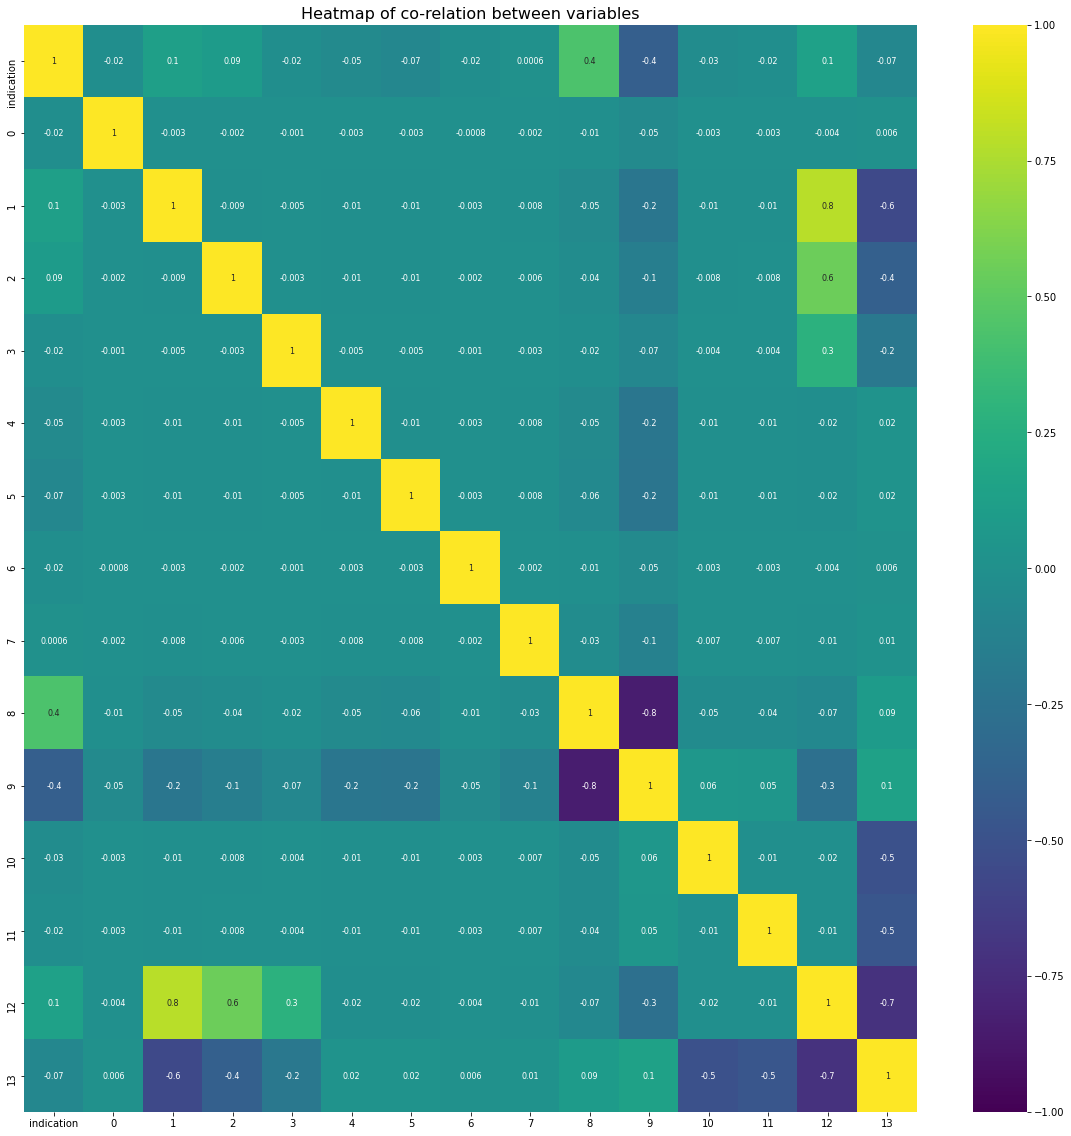

In [16]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(OH_df.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,annot_kws={"size":8},cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [21]:
OH_df.head()

,provision_id,meter_id,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
timestamp,,,,,,,,,,,,,,,,,
1992-01-01,527163,A86?05630,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2001-01-27,527184,A92Z45058,834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-01-27,527085,A92Z64097,395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-01,534261,A98M46797,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-27,1602996,A95D23852,617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Multi χρονοσειρές


In [22]:
df1=pd.pivot_table(df,values='indication',index=['timestamp'],columns=['provision_id'])
df1.fillna(0,inplace=True)
df1

provision_id,1306760,1399955,1495939,1499913,1602996,2072193,2209151,527085,527163,527184,534261,666668
timestamp,,,,,,,,,,,,
1992-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0,834.0,0.0,0.0
2001-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0
2001-02-27,0.0,0.0,0.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-03-15,363.0,1292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,0.0,0.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0
2020-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0


In [38]:
df1.to_csv('multitimeseries_provision')

In [23]:
df1.shape

(659, 12)

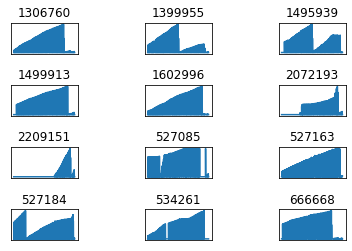

In [24]:
groups = [0,1,2,3,4,5,6,7,8,9,10,11]
values = df1.values
fig,sub = plt.subplots(4,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(df1.columns[i])

In [25]:
def report(df1):
    display(Markdown('<b>head():</b>'))
    display(df1.head())
    display(Markdown('<b>describe():</b>'))
    display(df1.describe())
    display(Markdown('<b>info():</b>'))
    display(df1.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df1.apply(lambda x: pd.api.types.infer_dtype(x.values)))
report(df)

<b>head():</b>

,provision_id,meter_id,provision_variation,meter_variation,indication
timestamp,,,,,
1992-01-01,527163,A86?05630,NORMAL,6-TOPOTHETISI,0
2001-01-27,527184,A92Z45058,NORMAL,NORMAL,834
2001-01-27,527085,A92Z64097,NORMAL,NORMAL,395
2001-02-01,534261,A98M46797,NORMAL,NORMAL,103
2001-02-27,1602996,A95D23852,NORMAL,NORMAL,617


<b>describe():</b>

,indication
count,1239.000000
mean,17974.139629
std,30833.168366
min,0.000000
25%,566.000000
50%,1822.000000
75%,8040.500000
max,101506.000000


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 1992-01-01 to 2020-08-31
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   provision_id         1239 non-null   object
 1   meter_id             1239 non-null   object
 2   provision_variation  1239 non-null   object
 3   meter_variation      1239 non-null   object
 4   indication           1239 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 58.1+ KB


None

<b>infer_dtype():</b>

provision_id            string
meter_id                string
provision_variation     string
meter_variation         string
indication             integer
dtype: object

# Multivariance Multi χρονοσειρές

In [36]:
df2 = pd.concat([df1,OH_df], axis=1)

df2.fillna(0,inplace=True)
df2

,1306760,1399955,1495939,1499913,1602996,2072193,2209151,527085,527163,527184,534261,666668,provision_id,meter_id,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1992-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,527163,A86?05630,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2001-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0,834.0,0.0,0.0,527184,A92Z45058,834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0,834.0,0.0,0.0,527085,A92Z64097,395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,534261,A98M46797,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2001-02-27,0.0,0.0,0.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1602996,A95D23852,617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,527085,A18?38688,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2020-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,534261,A18?37647,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2020-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,527184,A18?33148,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
df2.to_csv('multivariance_multitimeseries_provision')